In [28]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import copy, math

In [29]:
# 导入数据
path = '/Users/hanhuaxing/Desktop/GongLab/Code/Studying/吴恩达-MachineLearning-jupyter/Week2_MultipleLinearRegression/data/houses.txt'
data = pd.read_csv(path,header=None,names=['Size(sqft)','Bedrooms','Floors','Age','Prices'])

# 提取数据,方法一
X = np.c_[data['Size(sqft)'],data['Bedrooms'],data['Floors'],data['Age']]
y = data['Prices']

# 提取数据，方法二
data_array = data.values
a = data_array[1:,0:4]
b = data_array[1:,4]

In [30]:
# Function1: 数据缩放（z-score）---自己
def zscore_normalize_features_1(x):
    n = x.shape[1]
    m = x.shape[0]
    x_norm = np.zeros_like(x)
    miu = np.zeros_like(n)
    sigma = np.zeros_like(n)

    for j in range(n):
        miu[j] = np.mean(x[:,j])
        sigma[j] = np.std(x[:,j])
        for i in range(m):
            x_norm[i,j] = (x[i,j]-miu[j])/sigma[j]

    return miu,sigma,x_norm

In [31]:
# Function1: 数据缩放（z-score）---教材
def zscore_normalize_features(x):
    miu = np.mean(x,axis=0)
    sigma = np.std(x,axis=0)
    x_norm = (x-miu)/sigma
    return miu,sigma,x_norm

In [61]:
# Fuction2: Compute Cost ---自己
def compute_cost_multiple_feartures_1(x,y,w,b):
    cost = 0
    m = x.shape[0]
    
    for i in range(m):
        f_wb_i = np.dot(w,x[i])+b
        cost = cost + (f_wb_i-y[i])**2
    total_cost = cost / (2*m)

    return total_cost

In [33]:
# Fuction2: Compute Cost ---教材
def compute_cost_multiple_feartures(x,y,w,b):
    cost = 0.0
    m = x.shape[0]

    for i in range(m):
        f_wb_i = np.dot(w,x[i])+b
        cost = cost + (f_wb_i-y[i])**2
    cost = cost / (2*m)

    return cost

In [34]:
# Function3: Compute Gradient ---自己
def compute_gradient_multiple_features_1(x,y,w,b):
    m = x.shape[0]
    n = x.shape[1]

    dj_dw = np.zeros(n)
    dj_db = 0.

    for i in range(m):
        f_wb_i = np.dot(w,x[i])+b
        for j in range(n):
            dj_dw[j] = dj_dw[j]+(f_wb_i-y[i])*x[i,j]
        dj_db = dj_db + f_wb_i-y[i]
    dj_dw = dj_dw / m
    dj_db = dj_db / m

    return dj_dw,dj_db

In [35]:
# Function3: Compute Gradient ---教材
def compute_gradient_multiple_features(x, y, w, b): 

    m,n = x.shape          
    dj_dw = np.zeros((n,))
    dj_db = 0.

    for i in range(m):                             
        err = (np.dot(x[i], w) + b) - y[i]   
        for j in range(n):                         
            dj_dw[j] = dj_dw[j] + err * x[i, j]    
        dj_db = dj_db + err                        
    dj_dw = dj_dw / m                                
    dj_db = dj_db / m                                
        
    return dj_dw, dj_db

In [36]:
# Function4: Gradient Descending ---自己
def gradient_descending_multiple_features_1(x,y,w_int,b_int,alpha,iters,compute_cost,compute_gradient):
    w = copy.deepcopy(w_int)
    b = b_int
    J_hist = []

    for i in range(iters):
        dj_dw,dj_db = compute_gradient(x,y,w,b)
        w = w - alpha * dj_dw
        b = b - alpha * dj_db
        J_hist = J_hist.append(compute_cost(x,y,w,b))

        if i% math.ceil(iters / 10) == 0:
            print(f"Iteration {i:4d}: Cost {J_hist[-1]:8.2f}   ")

    return w,b,J_hist

In [55]:
# Function4: Gradient Descending ---教材
def gradient_descending_multiple_features(x,y,w_int,b_int,alpha,iters,compute_cost,compute_gradient):
    
    J_history = []
    w = copy.deepcopy(w_int)  #avoid modifying global w within function
    b = b_int
    
    for i in range(iters):

        dj_dw,dj_db = compute_gradient(x, y, w, b)   

        w = w - alpha * dj_dw              
        b = b - alpha * dj_db           
      
        # Save cost J at each iteration
        if i<100000:      # prevent resource exhaustion 
            J_history.append(compute_cost(x, y, w, b))

        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(iters / 10) == 0:
            print(f"Iteration {i}: Cost {J_history[-1]}   ")
    
    return w, b, J_history

In [98]:
c = X.shape[1]
w_in = np.zeros(c)
b_in = 0.0

miu,sigma,X_norm = zscore_normalize_features(X)

alpha = 1.0e-3
iters = 10000

final_w, final_b, J_his = gradient_descending_multiple_features(X_norm,y,w_in,b_in,alpha,iters,compute_cost_multiple_feartures,compute_gradient_multiple_features)
print(final_w,final_b)

Iteration 0: Cost 70879.39266731286   
Iteration 1000: Cost 10177.43688055759   
Iteration 2000: Cost 1922.1968584097062   
Iteration 3000: Cost 634.3139613583123   
Iteration 4000: Cost 370.5448771519717   
Iteration 5000: Cost 288.8891590976684   
Iteration 6000: Cost 254.198912309619   
Iteration 7000: Cost 237.33053533669673   
Iteration 8000: Cost 228.77423309903926   
Iteration 9000: Cost 224.38204851742637   
[107.59816227 -19.97869568 -30.95518273 -38.35385548] 362.2231564288373


In [62]:
final_w_1, final_b_1, J_his_1 = gradient_descending_multiple_features(X_norm,y,w_in,b_in,alpha,iters,compute_cost_multiple_feartures_1,compute_gradient_multiple_features_1)
print(final_w_1,final_b_1)

Iteration 0: Cost 71024.09199505128   
Iteration 1000: Cost 71024.019606387   
Iteration 2000: Cost 71023.94721780074   
Iteration 3000: Cost 71023.87482929247   
Iteration 4000: Cost 71023.80244086219   
Iteration 5000: Cost 71023.73005250993   
Iteration 6000: Cost 71023.65766423565   
Iteration 7000: Cost 71023.58527603939   
Iteration 8000: Cost 71023.51288792117   
Iteration 9000: Cost 71023.44049988098   
[ 0.00044579  0.00015096  0.00016637 -0.00029966] 0.001811193072466344


Text(0, 0.5, 'Cost')

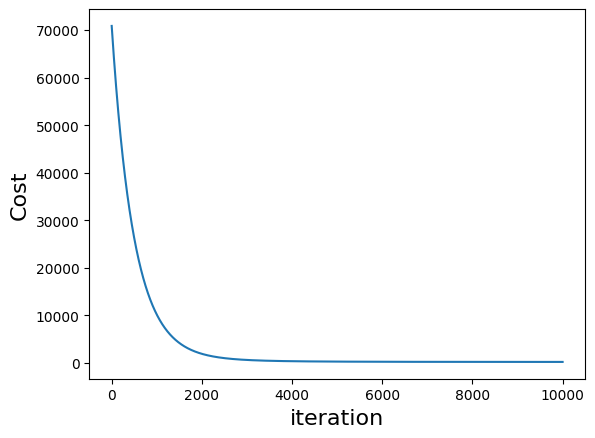

In [102]:
# 可视化
# Cost VS Iters
plt.plot(J_his)

plt.xlabel('iteration',fontsize=16)  # 添加横坐标轴标签
plt.ylabel('Cost',fontsize=16)  # 添加纵坐标轴标签

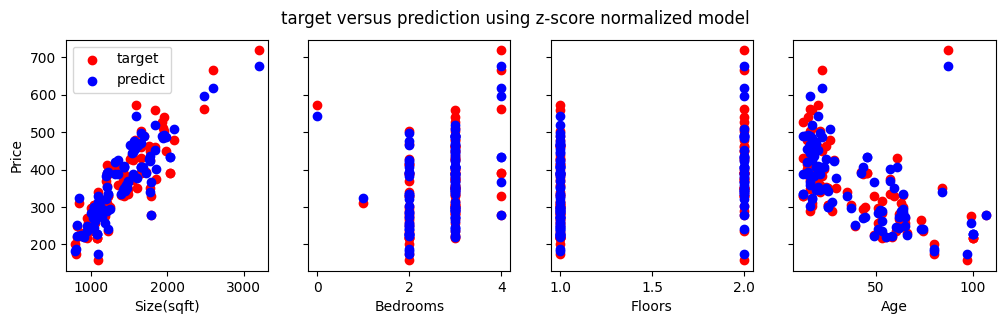

In [101]:
# 可视化
# Target VS Predict
target = y
X_predict = np.dot(X_norm,final_w) + final_b
feature_name = ['Size(sqft)','Bedrooms','Floors','Age','Prices']

fig,ax=plt.subplots(1,4,figsize=(12, 3),sharey=True)
num = range(len(ax))
for j in num:
    ax[j].scatter(X[:,j],y,c='r',label='target')
    ax[j].scatter(X[:,j],X_predict,c='b',label='predict')
    ax[j].set_xlabel(feature_name[j])
ax[0].set_ylabel("Price")
ax[0].legend()
fig.suptitle("Target versus Prediction using z-score normalized model")
plt.show()